# Electrical signaling in plants - Logbook

### by Teo Ruffini, Driscoll Elementary Science Fair, March 2016

## INDEX

Background

Hypothesis

Build process

Experimental plan

Method and Materials 

Read recorded data

First data acquisition (March 2nd 2016 18:36)

Look at the data

We plot the data to see what it looks like, both signal and flag channels 

Let's look at the spectrum of the data

Now we filter the signal to eliminate noise (we look for low frequency changes)

The data has been filtered to eliminate noise. We can plot it now and see if there is something interesting going on 
with the light changes

Conclusions

References

Annex: some needed functions for filtering

## Background

Plants communicate internally by various means: First, big communications by the vascular system, and short communications by the exchange of chemicals from cell to cell. The question we would like to explore is if, like others report, we can observe electrical changes associated to external stimuli.

## Hypothesis

We hypothesize that the electrical activity in the plant will change when we change enviromental parameters such as light or if we heat/burn a leave. 

## Experimental plan

We are going to do the following:



    

### 1. Connect an EEG system to a selected plant. We will put the experiment in a Faraday cage to minimize electrical noise.


We insert two electrodes in the plant's trunk. The two other reference electrodes used by Starstim will be placed on the trunk as well. 

### 2. We will subject the plant to different stimuli: light/dark, normal/heat.

We will repeat for 10 times the following

A. Darkness for 10 s

B. Light for 10 s

and record electrical signal for these periods


### 3. We will compare the electrical signals in the two conditions, $A$ and $B$ and verify if there are differences in the patterns of electricity. Repeat a couple of times and conclude.


We will record data for each moment, and then we will compare them, one by one.

## Methods and Materials

We will use a homemade Faraday cage using chicken wire. We will use an EEG system designed for humans but with good sensitivity.

In [2]:
from IPython.display import display
from IPython.display import Image

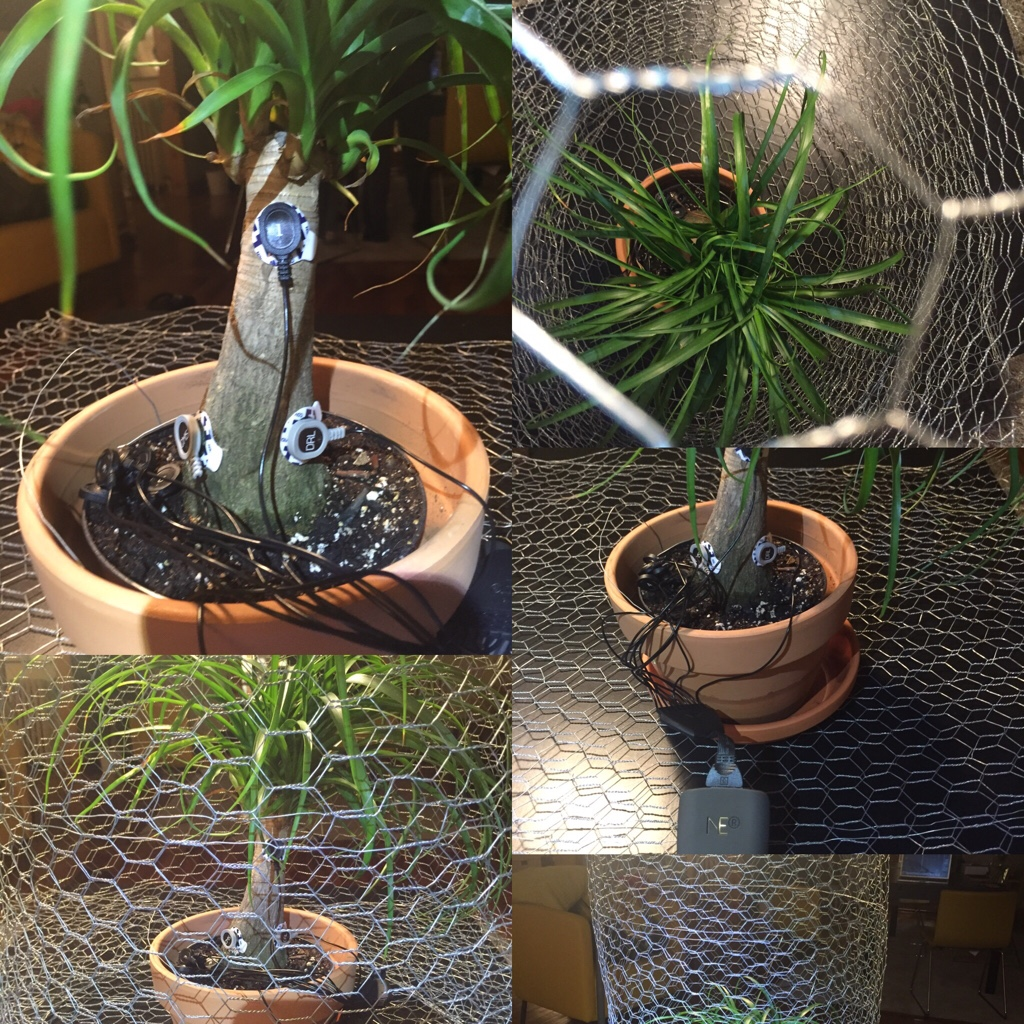

In [3]:
Image('./plantdata/plant.jpg')

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('sVJMFlD9OdQ')

# Here we are going to read the recorded data and do some simple analysis

# First data acquisition (March 2nd 2016 18:36)

In [4]:
# load needed libraries for reading txt data, dealing with arrays and plotting
from pandas import DataFrame, read_csv
import pandas as pd #this is how I usually import pandas
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, detrend,periodogram
%matplotlib inline  

# define the filename to read
Location ='./plantdata/20160302183637_PlantTest2.easy'
df = pd.read_csv(Location,delim_whitespace=True)

In [5]:
df.columns = ['Ch1','Ch2','Ch3', 'Ch4','Ch5', 'Ch6','Ch7','Ch8', 'Flag','unix time']

## Ok, let us look at the data

In [6]:
# get rid of columns we don't need here.
d = df.drop(['Ch2','Ch3', 'Ch4','Ch5', 'Ch6','Ch7','Ch8'], axis=1)

In [7]:
# demean the data in Ch1 column. Divide by 1000 to go from nV to uV (from nano to micro volts)
d.Ch1=d.Ch1/1000-d.Ch1[0]/1000 # go to uV
fs=500 # samples /second ... This is Starstim's sampling rate

# create a time column in seconds from beginning of file
d['t']=(d['unix time']-d['unix time'][0])/fs  

In [8]:
# create a variable to hold the state of light stimulation: on or off
# we will call this variable "u"
u=np.copy(df.Flag)*0.
s=0 # to start with, light was off

for n, val in enumerate(df.Flag):
    # if we see a flag equal to 2, light is on
    if df.Flag[n] == 2.:
        s=0
    # if flag is one, light is on
    elif df.Flag[n]==1.:
        s=1
    u[n]=s

## We plot the data to see what it looks like, both signal and flag channels 

Plot the data in Channel one, and also the light status variable:

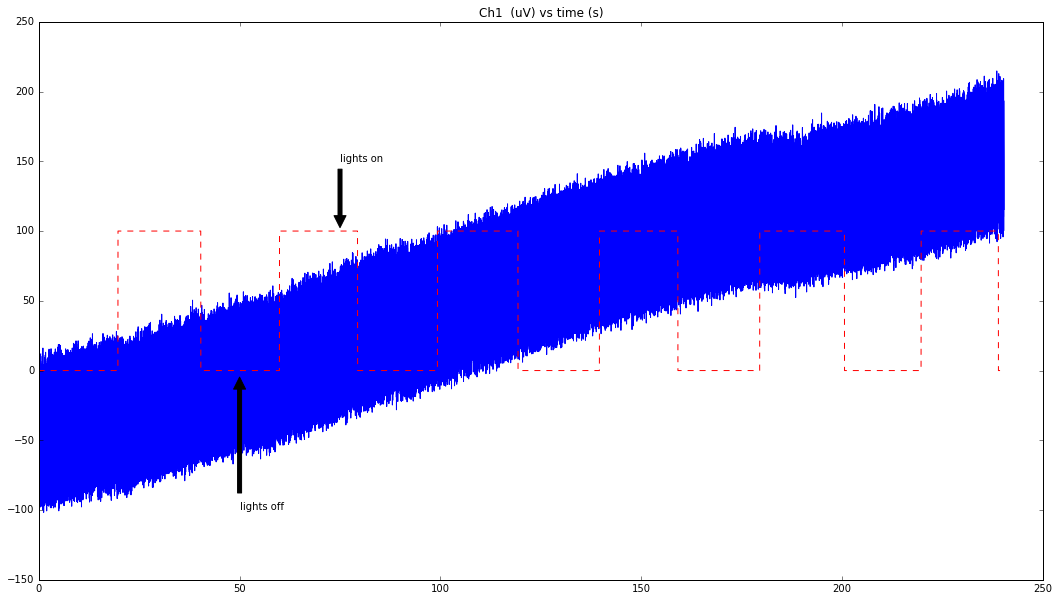

In [9]:
fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], d.Ch1,d['t'], u*100, 'r--') 
plt.title('Ch1  (uV) vs time (s)')

plt.annotate('lights on', xy=(75, 100), xytext=(75, 150),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('lights off', xy=(50, 0), xytext=(50, -100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

Figure: the data (unfiltered)

There is a linear trend in the data, let us look at it closer.

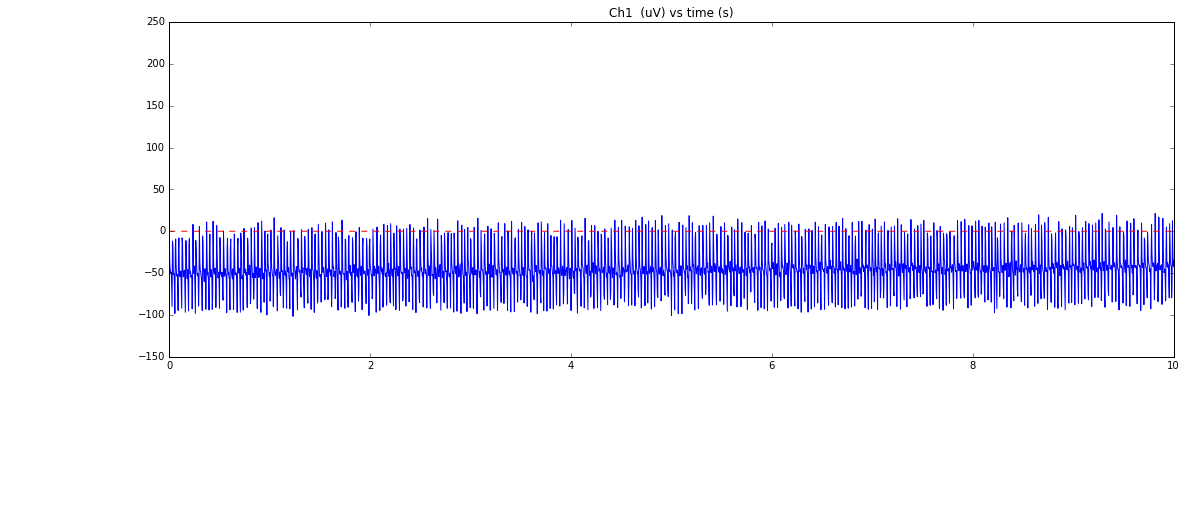

In [10]:
fig = plt.figure(figsize=[18.0, 6])
plt.plot(d['t'], d.Ch1,d['t'], u*100, 'r--') 
plt.title('Ch1  (uV) vs time (s)')
plt.annotate('lights on', xy=(75, 100), xytext=(75, 150),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('lights off', xy=(50, 0), xytext=(50, -100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.xlim((0,10))
plt.show()

## Let us look at the spectrum of the signal

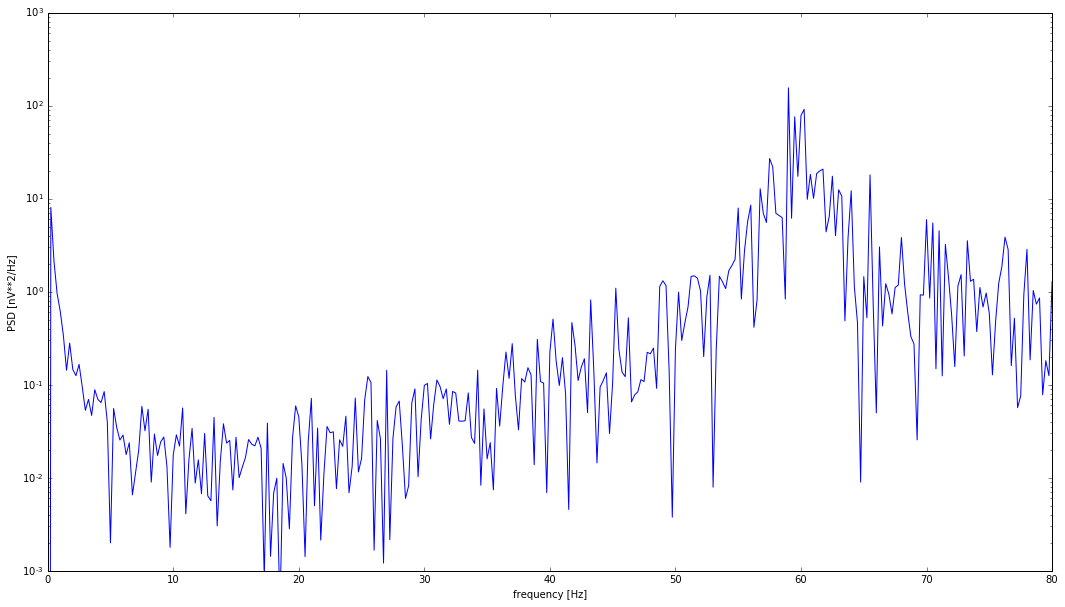

In [16]:
plotSpectrum(d.Ch1)

Figure: unfiltered spectrum

## Now we filter the signal to eliminate noise (we look for low frequency changes)

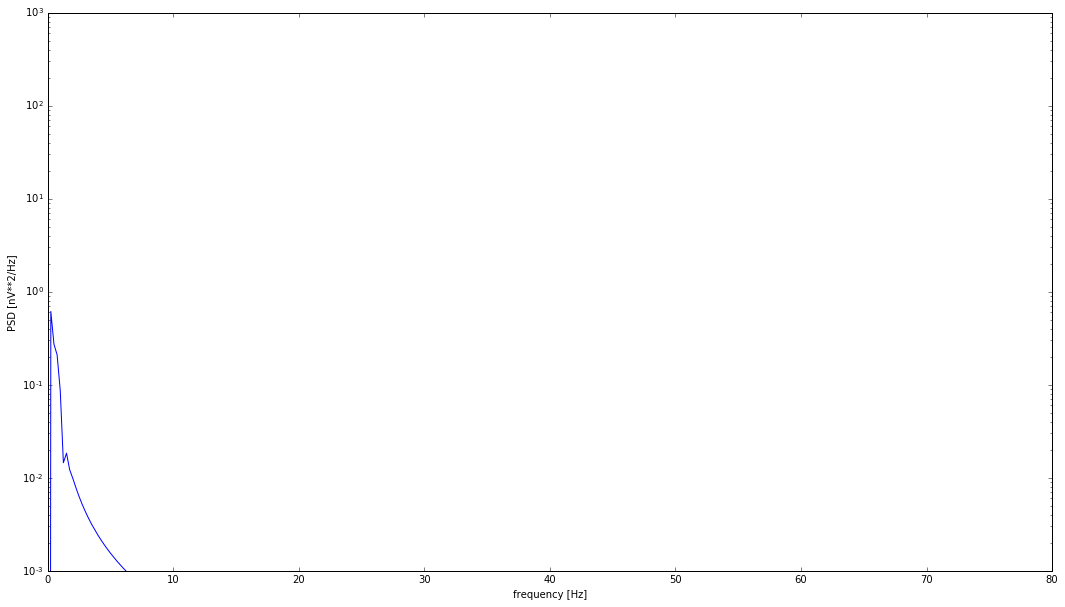

In [17]:
d['Ch1 filtered']= butter_lowpass_filter(detrend(d.Ch1), cutoff=1, fs=500, order=6)
plotSpectrum(d['Ch1 filtered'])

Figure: filtered spectrum

## The data has been filtered to eliminate noise. We can plot it now and see if there is something interesting going on with the light changes

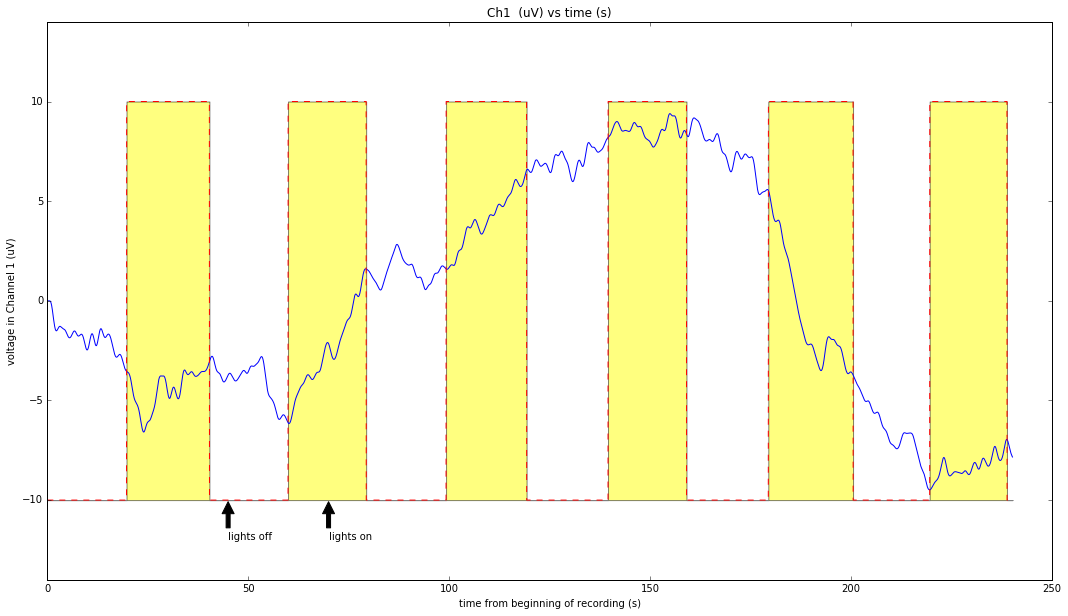

In [18]:
light=u*20-10
fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], d['Ch1 filtered'],d['t'], light, 'r--') 
plt.title('Ch1  (uV) vs time (s)')

plt.annotate('lights on', xy=(70, -10), xytext=(70, -12),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('lights off', xy=(45, -10), xytext=(45, -12),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.xlabel('time from beginning of recording (s)')
plt.ylabel('voltage in Channel 1 (uV)')
plt.ylim((-14,14))
plt.fill_between(d['t'], min(light), light, facecolor='yellow', alpha=0.5)
plt.savefig('plantPlot.png')
plt.show()

Figure: In this figure we show the filtered voltage signal (uV) with the lights-on /lights-off condition superimposed in yellow (yellow=lights on)

## Second experiment (March 9th 2016)

We did different tests.
TestPlant1= This was a test without Faraday cage

TestPlant2= This was a test with Faraday cate

TestPlant3wierd2= flashing light for 5 minutes

TestPlant3lightsonoff= Lights on, lights off or 5 minutes each 10 seconds

TestPlant4fire= putting a flame to one of the leaves, and then separating the fire from the leave

In [40]:
d = pd.read_csv('plantdata/20160309191904_PlantTest3lightsonoff.easy',delim_whitespace=True)
d.columns = ['Ch1','Ch2','Ch3', 'Ch4','Ch5', 'Ch6','Ch7','Ch8', 'Flag','unix time']
# demean the data in Ch1 column. Divide by 1000 to go from nV to uV (from nano to micro volts)
d.Ch1=d.Ch1/1000.-d.Ch1[0]/1000. # go to uV
d.Ch2=d.Ch2/1000.-d.Ch2[0]/1000. # go to uV
d.Ch3=d.Ch3/1000.-d.Ch3[0]/1000. # go to uV


D= d.Ch3-d.Ch1

fs=500 # samples /second ... This is Starstim's sampling rate

# create a time column in seconds from beginning of file
d['t']=(d['unix time']-d['unix time'][0])/fs  

# create a variable to hold the state of light stimulation: on or off
# we will call this variable "u"
u=np.copy(d.Flag)*0.
s=0 # to start with, light was off

for n, val in enumerate(d.Flag):
    # if we see a flag equal to 2, light is on
    if d.Flag[n] == 2.:
        s=0
    # if flag is one, light is on
    elif d.Flag[n]==1.:
        s=1
    u[n]=s

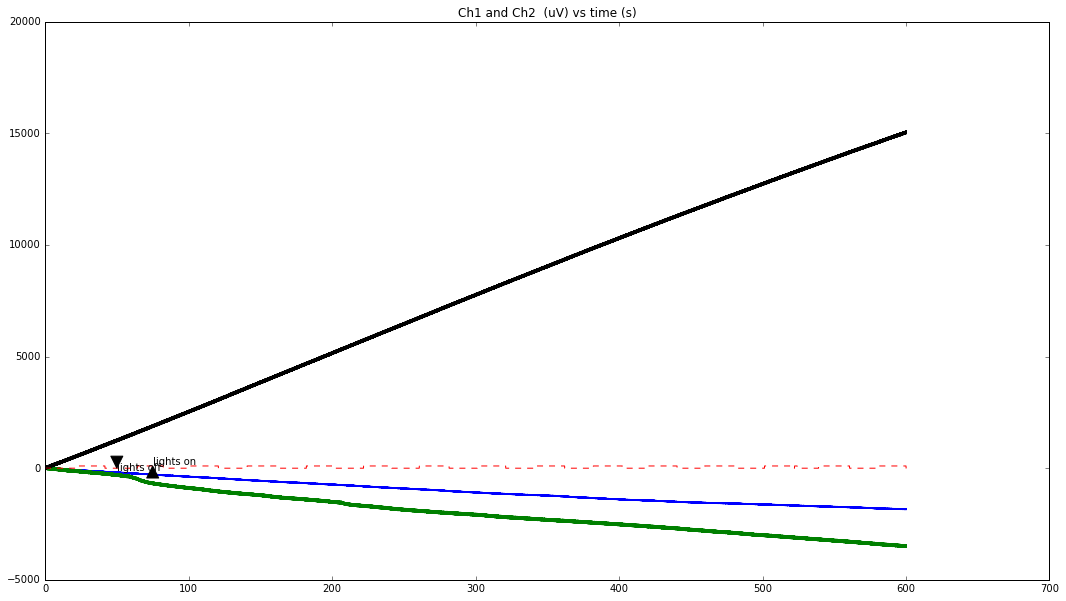

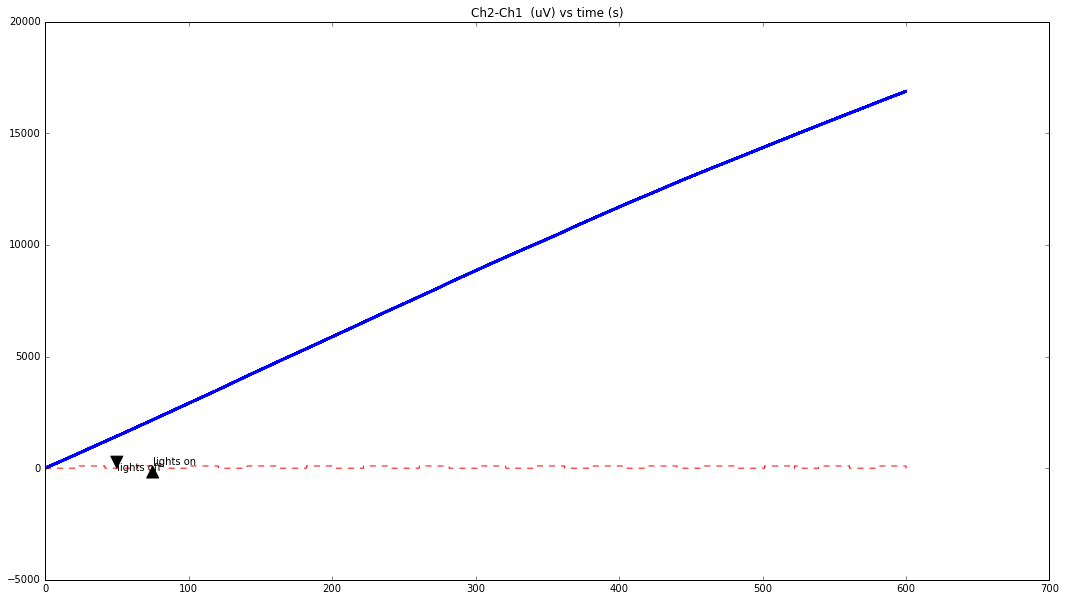

In [43]:
fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], d.Ch1,'b',d['t'],d.Ch2, 'g',d['t'],d.Ch3, 'k', d['t'], u*100, 'r--') 
plt.title('Ch1 and Ch2  (uV) vs time (s)')

plt.annotate('lights on', xy=(75, 100), xytext=(75, 150),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('lights off', xy=(50, 0), xytext=(50, -100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

fig = plt.figure(figsize=[18.0, 10])


plt.plot(d['t'], D,'b', d['t'],u*100, 'r--') 
plt.title('Ch2-Ch1  (uV) vs time (s)')

plt.annotate('lights on', xy=(75, 100), xytext=(75, 150),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('lights off', xy=(50, 0), xytext=(50, -100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()



Df= butter_lowpass_filter(detrend(D), cutoff=1, fs=500, order=6)
#plotSpectrum(Df)



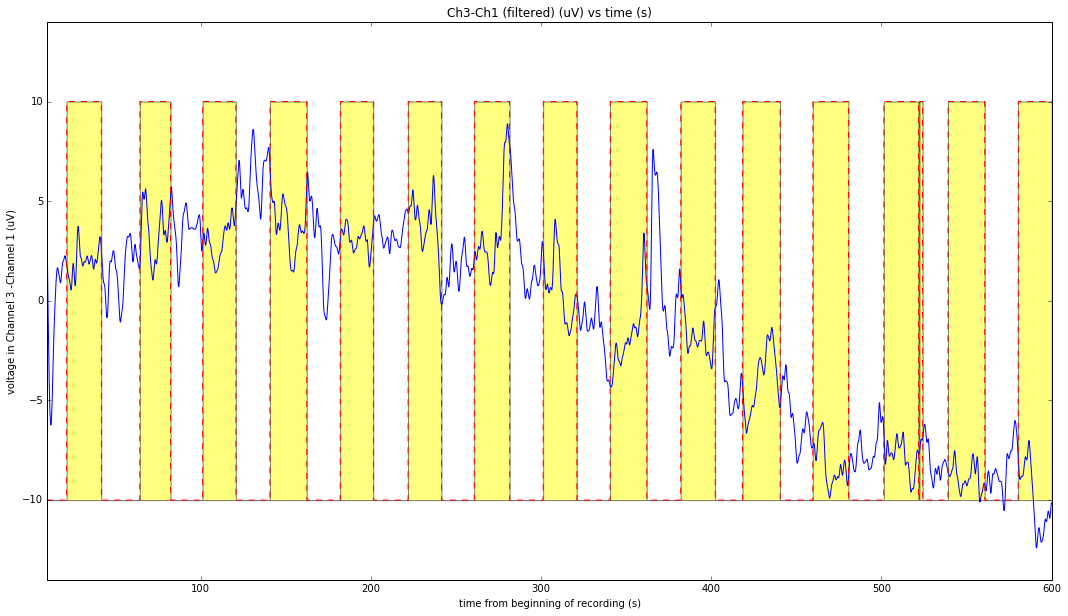

In [44]:
Df2 = Df - butter_lowpass_filter(detrend(D), cutoff=0.25, fs=500, order=5)

light=u*20-10
fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], Df2 ,d['t'], light, 'r--') 
plt.title('Ch3-Ch1 (filtered) (uV) vs time (s)')

#plt.annotate('lights on', xy=(70, -10), xytext=(70, -12),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

#plt.annotate('lights off', xy=(45, -10), xytext=(45, -12),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )
plt.xlabel('time from beginning of recording (s)')
plt.ylabel('voltage in Channel 3 -Channel 1 (uV)')
plt.ylim((-14,14))

plt.xlim((10, 600))
plt.fill_between(d['t'], min(light), light, facecolor='yellow', alpha=0.5)
plt.savefig('plantPlot2.png')
plt.show()

## Fire test


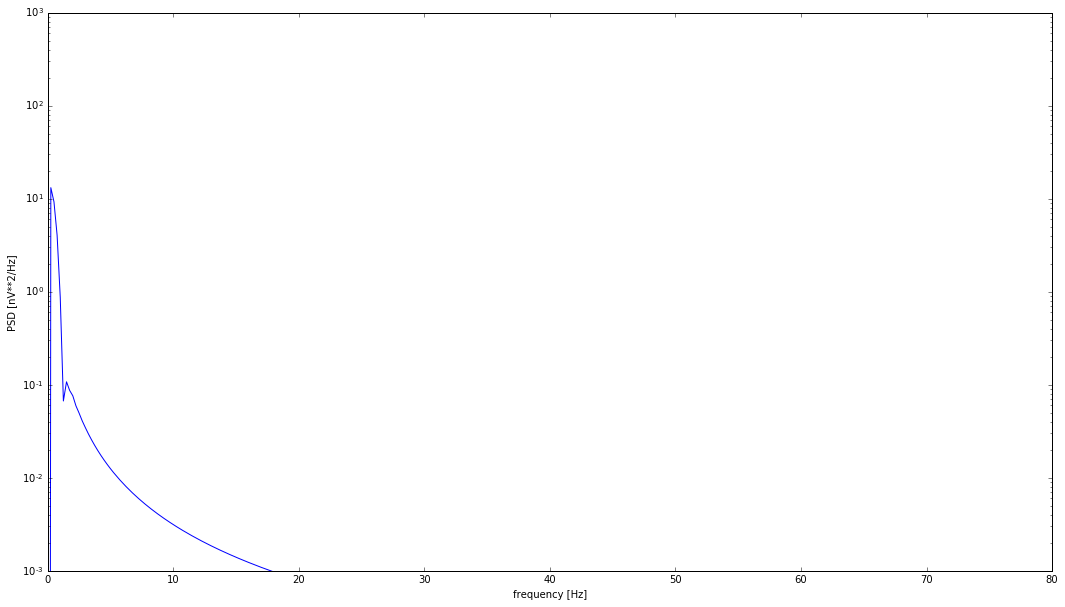

In [45]:
d = pd.read_csv('plantdata/20160309194459_PlantTest4firetest.easy',delim_whitespace=True)
d.columns = ['Ch1','Ch2','Ch3', 'Ch4','Ch5', 'Ch6','Ch7','Ch8', 'Flag','unix time']
# demean the data in Ch1 column. Divide by 1000 to go from nV to uV (from nano to micro volts)
d.Ch1=d.Ch1/1000.-d.Ch1[0]/1000. # go to uV
d.Ch2=d.Ch2/1000.-d.Ch2[0]/1000. # go to uV
d.Ch3=d.Ch3/1000.-d.Ch3[0]/1000. # go to uV


D= d.Ch3-d.Ch1

fs=500 # samples /second ... This is Starstim's sampling rate

# create a time column in seconds from beginning of file
d['t']=(d['unix time']-d['unix time'][0])/fs  

# create a variable to hold the state of light stimulation: on or off
# we will call this variable "u"
u=np.copy(d.Flag)*1.
s=0 # to start with, light was off

for n, val in enumerate(d.Flag):
     # if we see a flag equal to 2, light is on
     if d.Flag[n] == 2.:
         s=0
     # if flag is one, light is on
     elif d.Flag[n]==1.:
         s=1
     u[n]=s

Df= butter_lowpass_filter(detrend(D), cutoff=1, fs=500, order=6)
plotSpectrum(Df)

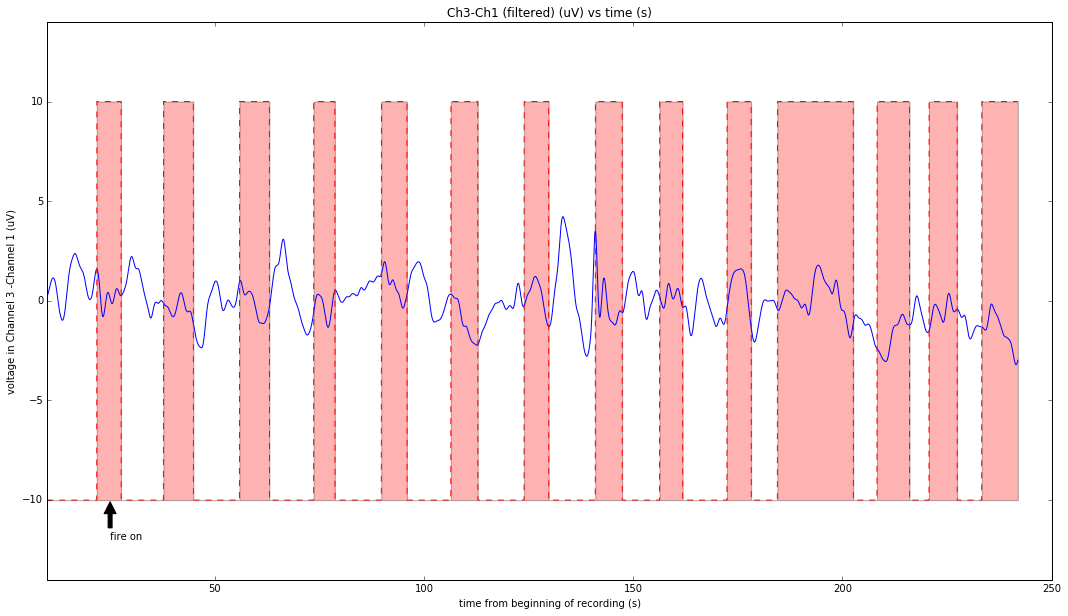

In [46]:
Df2 = Df - butter_lowpass_filter(detrend(D), cutoff=0.25, fs=500, order=5)

light=u*20-10
fig = plt.figure(figsize=[18.0, 10])
plt.plot(d['t'], Df2 ,d['t'], light, 'r--') 
plt.title('Ch3-Ch1 (filtered) (uV) vs time (s)')

plt.annotate('fire on', xy=(25, -10), xytext=(25, -12),
           arrowprops=dict(facecolor='black', shrink=0.05),
           )

#plt.annotate('lights off', xy=(45, -10), xytext=(45, -12),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )
plt.xlabel('time from beginning of recording (s)')
plt.ylabel('voltage in Channel 3 -Channel 1 (uV)')
plt.ylim((-14,14))

plt.xlim((10, 250))
plt.fill_between(d['t'], min(light), light, facecolor='red', alpha=0.3)
plt.savefig('plantPlot2.png')
plt.show()

# Conclusions


We have plotted the data! There are some trends but results are not 100% conclusive.  We need more experiments.

## References

- Stefano Mancuso and Alessandra Viola, Brilliant Green: The Surprising History and Science of Plant Intelligence,Island Press (March 12, 2015)
- JÖRG FROMM & SILKE LAUTNER, Electrical signals and their physiological significance in plants, Plant, Cell and Environment (2007) 30, 249–257 
- The secret life of plants, https://www.quantamagazine.org/20131216-the-secret-language-of-plants/
- Seyed A. R. Mousavi, Adeline Chauvin, François Pascaud, Stephan Kellenberger & Edward E. Farmer, GLUTAMATE RECEPTOR-LIKE genes mediate leaf-to-leaf wound signalling, Nature 500, 422–426 (22 August 2013) 




## Annex: some needed functions for filtering

In [15]:
def plotSpectrum(signal):
    fs=500
    fig = plt.figure(figsize=[18.0, 10])
    f, Pxx_den = periodogram(signal, fs,nfft= 4*fs)
    plt.semilogy(f, Pxx_den)
    plt.ylim([1e-3, 1e3])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [nV**2/Hz]')
    plt.xlim((0,80))
    plt.show()

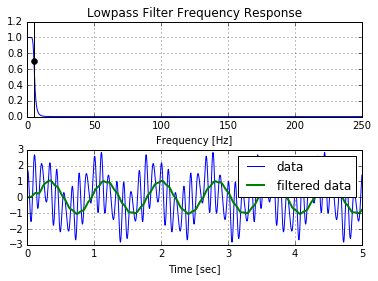

In [12]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y



def butter_bandpass(cutoff1, cutoff2, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff1 = cutoff1 / nyq
    normal_cutoff2 = cutoff2 / nyq

    b, a = butter(order, [normal_cutoff1,normal_cutoff2], btype='bandpass', analog=False)
    return b, a

def butter_bandpass_filter(data, cutoff1,cutoff2, fs, order=5):
    b, a = butter_bandpass(cutoff1,cutoff2, fs, order=order)
    y = lfilter(b, a, data)
    return y



# Filter requirements.
order = 6
fs = 500.0       # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()